In [35]:
import pandas as pd
import json

# Load the first file
with open('results/gsm8k_systematic_offset/results.json', 'r') as f:
    random_data = json.load(f)

# Load the second file
with open('results/gsm8k_systematic_offset_clean_only/results.json', 'r') as f:
    offset_data = json.load(f)

# Convert to DataFrames
df_random = pd.DataFrame(random_data)
df_offset = pd.DataFrame(offset_data)

# Add a column to distinguish the experiments
df_random['noise_type'] = 'Random Perturbation'
df_offset['noise_type'] = 'Clean Only'

# Combine them
df_combined = pd.concat([df_random, df_offset], ignore_index=True)

Text(0.5, 0.98, 'Performance Comparison: Systematic Offset vs. Clean Subset Only')

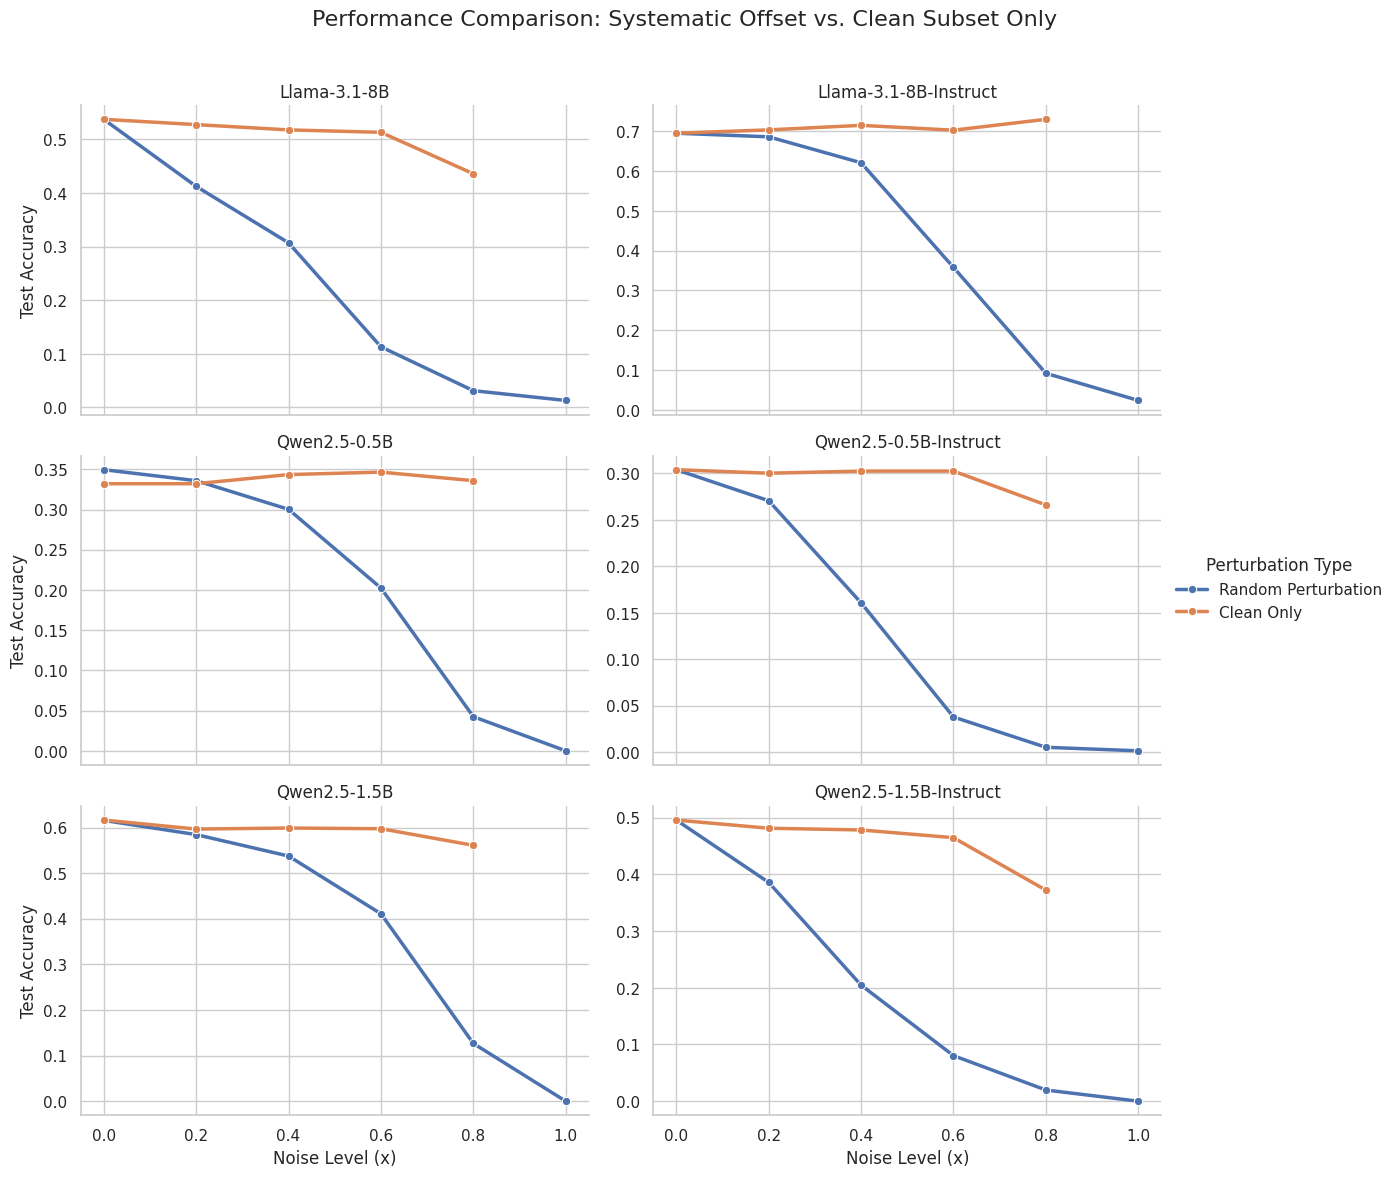

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_theme(style="whitegrid")

# Create a FacetGrid
# We want to compare the two noise types for each model.
# So, we'll map `noise_level` to x, `post_train_accuracy` to y, and `noise_type` to hue.
# We'll create a grid of plots, one for each model.

models = df_combined['model_label'].unique()
# Sort models to have a logical order: 0.5B Base, 0.5B Instruct, 1.5B Base, 1.5B Instruct
sorted_models = sorted(models) 

g = sns.FacetGrid(df_combined, col="model_label", col_wrap=2, height=4, aspect=1.5, sharey=False, col_order=sorted_models)
g.map(sns.lineplot, "noise_level", "post_train_accuracy", "noise_type", marker="o", linewidth=2.5)

# Add legend
g.add_legend(title="Perturbation Type")

# Set titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Noise Level (x)", "Test Accuracy")
# Set y-axis limits to 0-1 for all subplots
# for ax in g.axes.flat:
#     ax.set_ylim(0, 1)

# Adjust layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle(f"Performance Comparison: Systematic Offset vs. Clean Subset Only", fontsize=16)

Text(0.5, 0.98, "Training Loss: Systematic Offset vs. Clean Subset Only'")

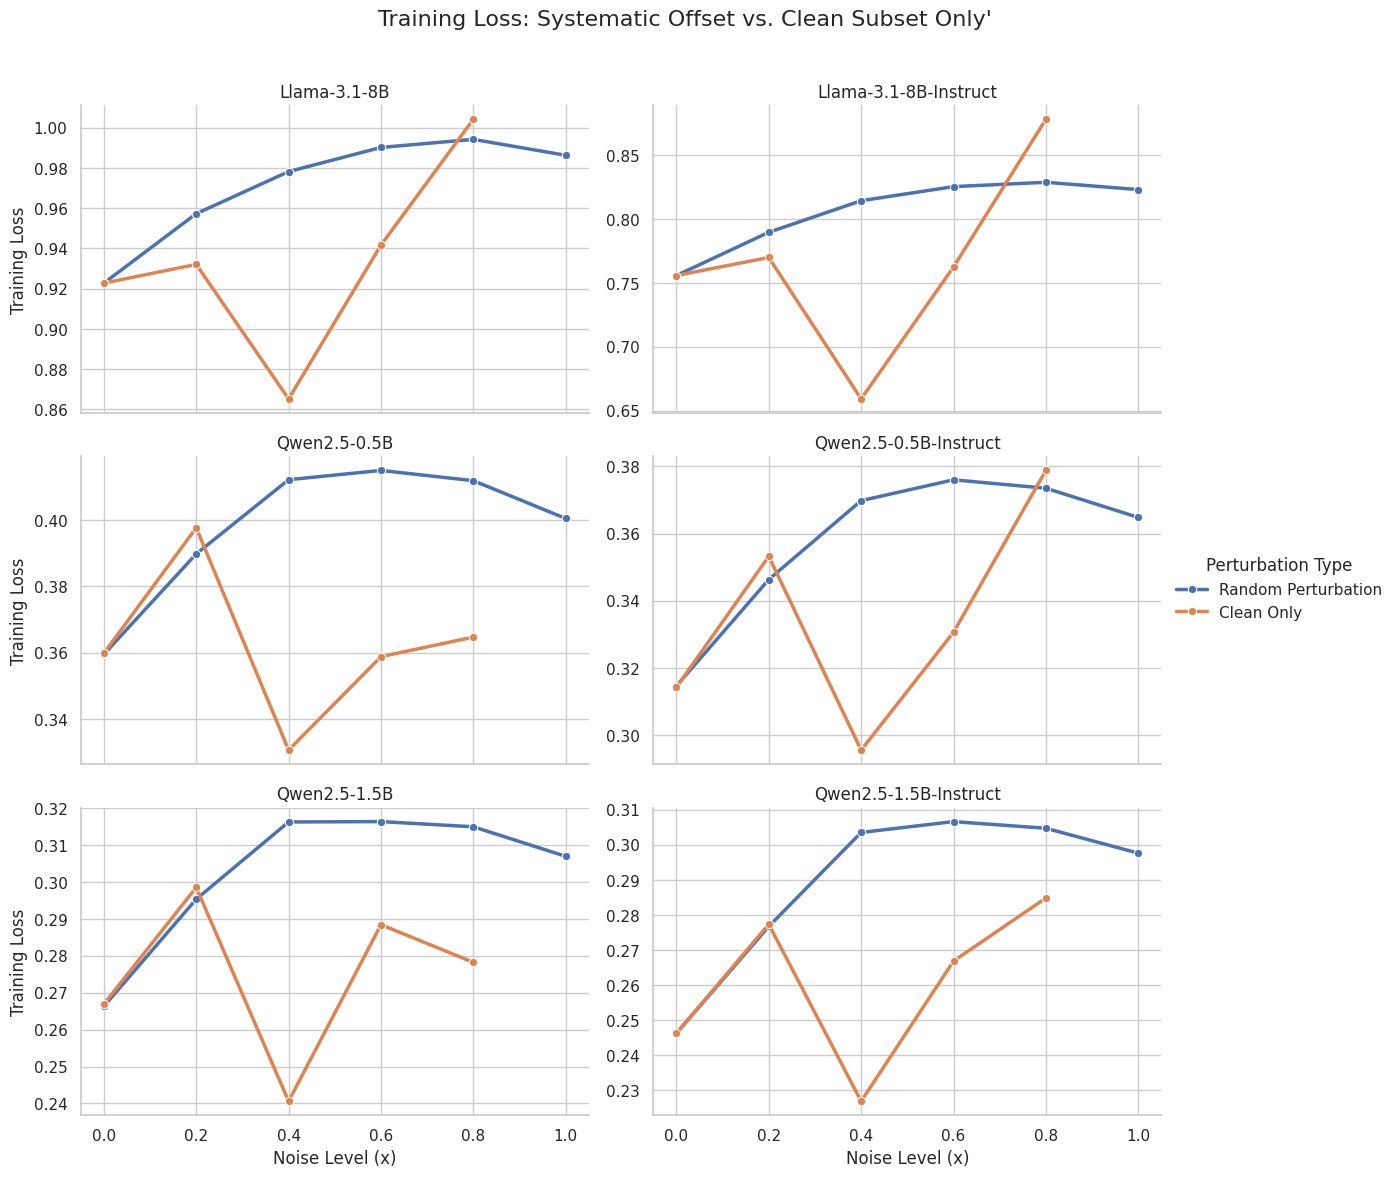

In [37]:
# Plot 2: Train Loss Comparison
g_loss = sns.FacetGrid(df_combined, col="model_label", col_wrap=2, height=4, aspect=1.5, sharey=False, col_order=sorted_models)
g_loss.map(sns.lineplot, "noise_level", "train_loss", "noise_type", marker="o", linewidth=2.5)
g_loss.add_legend(title="Perturbation Type")
g_loss.set_titles("{col_name}")
g_loss.set_axis_labels("Noise Level (x)", "Training Loss")
plt.subplots_adjust(top=0.9)
g_loss.fig.suptitle("Training Loss: Systematic Offset vs. Clean Subset Only'", fontsize=16)